## 0. Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import random
from IPython import display
%matplotlib inline
import time


## 1. Classe Graphs
### Attributs : 
- Le Graph

### Méthodes : 
- **plot_graph** : permet de tracer le Graph
- **iter_depth_first_searh** : méthode itérative de recherche en profondeur
- **breadth_first_search** : méthode itérative de recherche en largeur
- **find_paths_dfs** : méthode permetant de rechercher l'ensemble des chemins entre un points A et un pt B
- **dijkstra_rec** : méthode récursive permetant de chercher le plus cours chemin : basées sur l'algorithme de Dijkstra. Cette methode utile pour fonctionner :
    * **print_father** : méthode renvoyant la liste des sommets à partir d'un dictionnaire
    * **shortest_path** : lgorithme de Dijkstra pour trouver le plus cours chemin

In [2]:
class Graphs:
    '''
    -------------
    DESCRIPTION :   Class Graph : classe permettant d'effectuer un certain 
                    nombre d'opération sur un graph (Dict)
    -------------
    Attributs :     graph (Dict)
    Methodes :      - plot_graph : permet de tracer le Graph
                    - iter_depth_first_searh : méthode itérative de 
                        recherche en profondeur
                    - breadth_first_search : méthode itérative de 
                        recherche en largeur
                    - find_paths_dfs : méthode permetant de rechercher 
                        l'ensemble des chemins entre un points A et un pt B
                    - dijkstra_rec : méthode récursive permetant de chercher 
                        le plus cours chemin : basées sur l'algorithme de Dijkstra. 
                        Cette methode utile pour fonctionner :
                            * print_father : méthode renvoyant la liste des sommets 
                                à partir d'un dictionnaire
                            * shortest_path : lgorithme de Dijkstra pour trouver 
                                le plus cours chemin
    -------------
    '''
    
    
    def __init__(self, graph):
        '''
        -------------
        DESCRIPTION :   Instencie l'objet graph.
        -------------
        '''
        self.graph = graph
        
        
    def plot_graph(self, layout_prog, force_plot=False):
        '''
        -------------
        DESCRIPTION :   Permet de plot un graph avec networkx
        -------------
        INPUT :         graph (Dict)
        OUTPUT :        None
        -------------
        '''
        print('...'*20)
        if len(self.graph.keys())<=120 or force_plot==True:

            g = nx.Graph()
            g.add_nodes_from(list(self.graph))
            for node, edges in self.graph.items():
                g.add_edges_from(([(node, edge) for edge in edges]))

            # pos = graphviz_layout(g, prog="twopi") ## position circulaire (opposé s'il n'y a que deux branches)
            pos = graphviz_layout(g, prog = layout_prog)
            print('Graph plot : ')
            nx.draw(g, pos, with_labels= True)
            plt.show()
        else:
            print('Graph dimention {} , do not permit maze ploting')
            print('Try yo generate a smaller one or force Graph ploting using the parameter force_plot=True')
        
        
    def iter_depth_first_searh(self, node):
        '''
        -------------
        DESCRIPTION :   Retourne la liste des sommets rencontrés lors
                        d'un parcours en PROFONDEUR du Graphe <graph> issu 
                        du sommet <node> 
                        --> Fonction iterative
                        L'itération est quand une boucle s'exécute de façon répétée 
                        jusqu'à ce que la condition de contrôle devienne fausse.
        -------------
        INPUTS :        - graphe (Dict)
                        - start (int, str) -> Point de départ 
        OUTPUT :        List des points parcourus
        -------------
        '''
        visited = []
        stack = deque()
        stack.append(node) # add a new entry 'contained in node' to the right side

        # Just stack : Once all the items have been removed with the .pop() method and the deque is empty, 
        # stack became false, and the loop terminates.
        while stack: 

            # return and remove the rightmost node in stack
            node = stack.pop() 

            if node not in visited: 

                # add the 'node' to the right side of the list
                visited.append(node) 
                unvisited = [n for n in self.graph[node] if n not in visited]

                # add multiple elements at queue
                stack.extend(unvisited)

        return visited

    
    def recursive_dfs(self, node, visited=None): 
        ''' 
        DESCRIPTION : 

        Retourne la liste des sommets rencontrés lors
        d'un parcours en PROFONDEUR du Graphe <graph> issu 
        du sommet <node>

        --> Fonction récursive
        La récursivité se produit lorsqu'une instruction dans 
        une fonction s'appelle elle-même plusieurs fois.

        INPUT : - graphe (Dict)
                - node (int, str) -> Point de départ 

        OUTPUT : List des points parcourus
        '''
        if visited is None:
            visited = []

        if node not in visited:

            # add the 'node' to the right side of the list
            visited.append(node)

        unvisited = [n for n in self.graph[node] if n not in visited]

        for node in unvisited:
            self.recursive_dfs(self.graph, node, visited) # recusive method : recursive_dfs is call inside her

        return visited


    def breadth_first_search(self, node):
        ''' 
        -------------
        DESCRIPTION :   Retourne la liste des sommets rencontrés lors
                        d'un parcours en LARGEUR du Graphe <graph> issu 
                        du sommet <start>
        -------------
        INPUTS :        - graphe (Dict)
                        - start (int, str) -> Point de départ 
        OUTPUT :        List des points parcourus
        -------------
        '''
        visited = []
        stack = deque()
        stack.append(node)

        while stack:

            # return and remove the leftmost item
            node = stack.popleft()

            if node not in visited:

                # add the 'node' to the right side of the list
                visited.append(node)
                unvisited = [n for n in self.graph[node] if n not in visited]

                # add multiple elements at queue
                stack.extend(unvisited) 

        return visited
    
    
    def find_paths_dfs(self, start_node, end_node):
        '''
        -------------
        DESCRIPTION :   Permet de déterminer s'il existe des chemins d'un noeud à un autre.
                        Utilise le parcours en PROFONDEUR.
                        Retourne un ensemble de liste des sommets rencontrés lors
                        d'un parcours en PROFONDEUR du Graphe <graph> issu 
                        du sommet <start_node> jusqu'au sommet <end_node>
        -------------
        INPUTS :        - graphe (Dict)
                        - start (int, str) -> Point de départ 
                        - end_node (int, str) -> Point d'arrivée 
        OUTPUT :        List des paths posibles parcourus
        -------------
        '''
        stack = deque()
        stack.append((start_node, [start_node]))

        while stack:

            # return and remove the rightmost item
            (node, path) = stack.pop()
            adj_nodes = [n for n in self.graph[node] if n not in path]

            for adj_node in adj_nodes:
                if adj_node == end_node:
                    yield path + [adj_node]
                else:
                    stack.append((adj_node, path + [adj_node]))
           
        

    def print_father(self, father, start_node, end_node, path):
        """
        -------------
        DESCRIPTION :   À partir du dictionnaire des pères de chaque sommet on renvoie
                        la liste des sommets du plus court chemin trouvé. Calcul récursif.
                        On part de la fin et on remonte vers le départ du chemin.
        -------------

        """
        if end_node == start_node:
            return [start_node] + path
        else:
            return (self.print_father(father, start_node, father[end_node], [end_node] + path))



    def shortest_path(self, step, end_node, visited, dist, father, dep):
        """
        -------------
        DESCRIPTION :   Trouve récursivement la plus courte chaine entre debut 
                        et fin avec l'algo de Dijkstra visites est une liste et 
                        dist et pere des dictionnaires.
        -------------
        INPUTS : 
         - self.graph : le graphe étudié                                              (dictionnaire)
         - step       : le sommet en cours d'étude                                    (sommet)
         - end        : but du trajet                                                 (sommet)
         - visited    : liste des sommets déjà visités                                (liste de sommets)
         - dist       : dictionnaire meilleure distance actuelle entre 
                        départ et les sommets du graphe                               (dict sommet : int)
         - father     : dictionnaire des pères actuels des sommets correspondant 
                        aux meilleurs chemins                                         (dict sommet : sommet)
        dep        :    sommet global de départ                                       (sommet)
        OUTPUTS :       Retourne le couple 
                        (longueur mini (int), trajet correspondant (liste sommets)) 
        """
        # si on arrive à la fin, on affiche la distance et les peres
        if step == end_node:
            return dist[end_node], self.print_father(father, dep, end_node, [])

        # si c'est la première visite, c'est que l'étape actuelle est le départ : on met dist[step] à 0
        if  len(visited) == 0 : dist[step] = 0

        # on commence à tester les voisins non visités
        for adj_node in self.graph[step]:
            if adj_node not in visited:

                # la distance est soit la distance calculée précédemment soit l'infini
                adj_dist = dist.get(adj_node, float('inf'))

                # on calcule la nouvelle distance calculée en passant par l'étape
                candidat_dist = dist[step] + self.graph[step][adj_node]

                # on effectue les changements si cela donne un chemin plus court
                if candidat_dist < adj_dist:
                    dist[adj_node] = candidat_dist
                    father[adj_node] = step

        # on a regardé tous les voisins : le noeud entier est visité
        visited.append(step)

        # on cherche le sommet *non visité* le plus proche du départ
        unvisited = dict((s, dist.get(s, float('inf'))) for s in self.graph if s not in visited)
        noeud_plus_proche = min(unvisited, key = unvisited.get)

        # on applique récursivement en prenant comme nouvelle étape le sommet le plus proche 
        return self.shortest_path(noeud_plus_proche, end_node, visited, dist, father, dep)

    
    
    def dijkstra_rec(self, start_node, end_node):
        '''
        -------------
        DESCRIPTION : Appelle la fonction récursive de l'algo de Dijkstra.
        -------------
        '''
        return self.shortest_path(start_node, end_node, [], {}, {}, start_node)

## 2. Class mazes
### Attributs : 
- ** **

### Méthodes : 
- ** ** : 
- ** ** : 

In [3]:
show_steps_gen = False # True or False

# Dimensions de la grille:

class Mazes(Graphs):

    def __init__(self, node = (0,0)):
        """
        -------------
        DESCRIPTION :   Mazes Class intinialisation methode :
                        Ask the desired Maze dimensions to the user in order to generate it.
        -------------
        INPUTS :        Initial node (tuple : (x, y)) in  the map -> Coordonnées du point de départ 
                        dans le plan.
                        <-défault-> (0, 0)
        -------------
        """
        maze_dim = [0,0]
        for i in range(2):
            while True:
                if i == 0:
                    num = input("Width of your labyirinth? Please enter an Integer number : ")
                else:
                    num = input("Height of your labyirinth? Please enter an Integer number : ")
                try:
                    maze_dim[i] = int(num)
                    print("Input is an integer number.")
                    if i == 0:
                        print("Input number for the Labyrinth Width is : ", maze_dim[i])
                        print('...'*20)
                    else:
                        print("Input number for the Labyrinth Height is : ", maze_dim[i])
                        print('...'*20)
                    break;
                except ValueError:
                    print("The value is not a number. Please enter a valid number")
                    print('...'*20)
        self.maze_dim = maze_dim
        self.path_gen = {node}
        self.graph = {}
        #self.gen_maze_iter_dfs(self, node)
        #self.associate_graph(self)

        
    def neighborhood(self, node):
        """
        -------------
        DESCRIPTION :   Renvoie la liste des cellules voisines
                        de la cellule (ligne, colonne) = couple dans la grille.
        -------------
        """
        neighbord_list = []
        x, y = node[0], node[1]
        for d in (-1, 1):
            if -1 < x+d < self.maze_dim[1]: neighbord_list.append((x+d, y))
            if -1 < y+d < self.maze_dim[0]: neighbord_list.append((x, y+d))
        return neighbord_list


    def gen_maze_iter_dfs(self, node):
        '''
        -------------
        DESCRIPTION :   Retourne la liste des sommets rencontrés lors
                        d'un parcours en PROFONDEUR du Graphe créée issu 
                        du sommet <node>.
        -------------
        INPUTS :        node (tuple : (x, y)) -> Coordonnées du point de départ 
                        dans le plan.
        OUTPUT :        Dictionnaire de la liste des points parcourus pour la 
                        génération du Labyrinthe.
        -------------
        '''
        print('...'*20)
        print('Generation of the maze using dfs algorithm. Maze dimension : {}*{} = {} cells'.format(self.maze_dim[0], self.maze_dim[1], self.maze_dim[0] * self.maze_dim[1]))
        visited = {node: None} #node: None
        stack = deque()
        stack.append(node)
        while stack:
            node = stack.pop()
            stack.append(node)
            adj_nodes = [neighbord for neighbord in self.neighborhood(node) if neighbord not in visited]
            if adj_nodes :
                adj_node = random.choice(adj_nodes)

                visited[adj_node] = node
                stack.append(adj_node)
            else :
                stack.pop()
        self.path_gen = visited
        print('...'*20)
        print('Maze Generation -> done')
        
        return self.path_gen
        

    def associate_graph(self):
        """
        -------------
        DESCRIPTION :   Compute the graph associated to the Maze object generated by 
                        the dfs algorithm
        -------------
        INPUTS :        Maze object
        OUTPUT :        Graph (Dict)     
        -------------
        """
        for node in self.path_gen.keys():
            self.graph[node] = [self.path_gen[node]]
            if self.path_gen[node] in self.graph.keys():
                self.graph[self.path_gen[node]].append(node)

        for node in self.graph.keys():
            self.graph[node] = {node_son : 1 for node_son in self.graph[node] if node_son != None}
        
        ## Verify the concordance between Graph node's number and maze number of cells
        if len(self.graph.keys()) != self.maze_dim[0]*self.maze_dim[1]:
            print('Warning : The number of Graph nodes is not coherent with respect to maze number of cells')
            print('number of Graph nodes', len(self.graph.keys()))
        else:
            print('...'*20)
            print('Associated Graph Generation -> done')
            
        return self.graph
    
    
    
    def aleat_graph_init(self):
        """
        -------------
        DESCRIPTION :   Initialise le graph conexe représentant le dédale 
                        de sommets avec tous ses possibles voisins.
        -------------
        INPUT :     self : (notament les dimensions du labyrinthe choisis par 
                    l'utilisateur)
        IOUTPUT :   
        -------------         
        """
        graph={}
        for x in range(self.maze_dim[1]):
            for y in range(self.maze_dim[0]):
                graph[(x,y)] = {neighbord : 1 for neighbord in self.neighborhood((x, y))}
                
        return graph
    
    
    
    def assign_weight(self, graph):
        """
        -------------
        DESCRIPTION :   Assigner de façon aléatoire un poid à l'arc 
                        entre deux sommet (et ce pour tous les sommets)
        -------------
        INPUT :     graph -> un graph auquel on veux attribuer des 
                    poids, ce peux etre le graph representant tous 
                    les sommets du dédale ou bien l'arbre recouvrant
                    représentant Labyrinthe
        IOUTPUT :   graph ayant le poinds de ses arcs attribués 
                    aléatoirement
        -------------         
        """
        ###print('connex graph : ', graph)
        for node, adj_nodes in graph.items():
            for adj_node in adj_nodes.keys():
                ## poid aléatoire
                val = int(random.uniform(1, 5))
                
                ## attribution de ce poid sur l'arc
                graph[node][adj_node] = val
                graph[adj_node][node] = val
                
        return graph
    
    
    
    def gen_maze_prim(self, node=(0, 0)):
        """
        -------------
        DESCRIPTION :   Génération du Labyrinthe en utilisant l'algo de 'prim'
                        -> Recherche de l'arbre couvrant (arbre contenant tous 
                        les sommets) et de poid minimal dans un graph connexe 
                        généré à partir des dimension souhaitées du labyrinthe
        -------------
        INPUT :     self : 
        IOUTPUT :   
        -------------         
        """
        print('...'*20)
        print('Generation of the maze using dfs algorithm. Maze dimension : {}*{} = {} cells'.format(self.maze_dim[0], self.maze_dim[1], self.maze_dim[0] * self.maze_dim[1]))
        
        G = self.aleat_graph_init() ## Génération du graph connexe
        G = self.assign_weight(G) ## Attribution aléatoire des poids sur les arcs
        visited = set()
        self.path_gen ={}
        father = {}
        unvisited = {}
        
        for u in G.keys():
            unvisited[u] = float('inf') # à chaque sommet non visité on attribu un poid infini
            father[u] = u # pour l'instant chaque sommet et son propre père
        self.graph = {}
        unvisited[node] = 1 # Tous les sommets on un poid infini sauf node qui est à 1
        
        while len(G.keys())>len(visited):
            u = min(unvisited, key=unvisited.get)
            self.graph[u] = {father[u] : 1}
            self.path_gen[u] = father[u]
            visited.add(u)
            
            for v in G[u]:
                if v not in visited:
                    if G[u][v]<unvisited[v]:
                        father[v] = u # nouveau père
                        unvisited[v] = G[u][v]
                        
            unvisited.pop(u)
        print('...'*20)
        print('Maze Generation -> done')
        
        return self.graph
    
    
    ## Pas encore utilisé
    def generate(self, node=(0,0), gen_type='dfs'):
        """
        -------------
        DESCRIPTION :   Fonction permettant de choisir le type de généartion
                        du labyrinthe : 'dfs' ou 'prim'
        -------------
        INPUT :         - self
                        - gen_type : 'dfs' ou 'prim' : Choix de l'algorithme
                        pour génerer le Labyrinthe.
        -------------
        """
        if gen_type=='dfs':
            print('Maze generation using dfs algogithm')
            #self.gen_maze_iter_dfs(self, node)
            #self.associate_graph(self)
            
        elif gen_type=='prim':
            print('Maze generation using prim algogithm')
            #self.gen_maze_prim(self, node)
        else:
            print('Unknown value in gen_type parameter')
        
        
    def plot_maze(self, short_path={}, show_steps_gen=False):
        """
        -------------
        DESCRIPTION :   Fonction dessinant le labyrinthe dans un plans à partir
                        des coordonnéees (x, y). 
                        ... A modifier ...
                        Les coordonnées sont inversée car matplotlib trace x en fonction
                        de y alors que dans une martice on lit lignes * colonnes
                        ... A modifier ...
        -------------
        """
        WIDTH = self.maze_dim[0]
        HEIGHT = self.maze_dim[1]
        maze = [[0 for j in range(2*WIDTH+1)] for i in range(2*HEIGHT+1)]

        fig = plt.figure(figsize=(14,14))
        # on cache les graduations:
        plt.xticks([])
        plt.yticks([])

        for i, j in self.path_gen:
            maze[2*i+1][2*j+1] = 1
            if (i, j) !=  (0, 0):
                k, l = self.path_gen[(i, j)]
                maze[2*k+1][2*l+1] = 1
                maze[i+k+1][j+l+1] = 1

            if show_steps_gen: 
                ## le graphique:
                plt.imshow(maze)
                #plt.pause(0.05)
                display.clear_output(wait=True)
                display.display(plt.gcf())
                time.sleep(0.5)
                
        if short_path:
            for i, j in short_path:
                maze[2*i+1][2*j+1] = 2
                if (i, j) !=  (0, 0):
                    k, l = short_path[(i, j)]
                    maze[2*k+1][2*l+1] = 2
                    maze[i+k+1][j+l+1] = 2

            
        ## Entrée et Sortie    
        maze[1][1] = 3
        maze[2*HEIGHT-1][2*WIDTH-1] = 2
        
        ## le graphique:
        #plt.pcolormesh(maze)
        plt.imshow(maze)
        plt.show()

        

## 3. Génération (utilisant algo dfs) / Affichage et Parcours de Labyrinthe
### 3.1. Génération

In [4]:
## Init
dep_pt = (0,0)

## Generate Maze
maze1 = Mazes(node=dep_pt)
maze1.gen_maze_iter_dfs(node=dep_pt)
#maze1.generate(node=dep_pt)

# Get the Maze dimensions
arr_pt = (maze1.maze_dim[1]-1, maze1.maze_dim[0]-1)

Width of your labyirinth? Please enter an Integer number : 10
Input is an integer number.
Input number for the Labyrinth Width is :  10
............................................................
Height of your labyirinth? Please enter an Integer number : 8
Input is an integer number.
Input number for the Labyrinth Height is :  8
............................................................
............................................................
Generation of the maze using dfs algorithm. Maze dimension : 10*8 = 80 cells
............................................................
Maze Generation -> done


### 3.2. Affichage du Labyrinthe

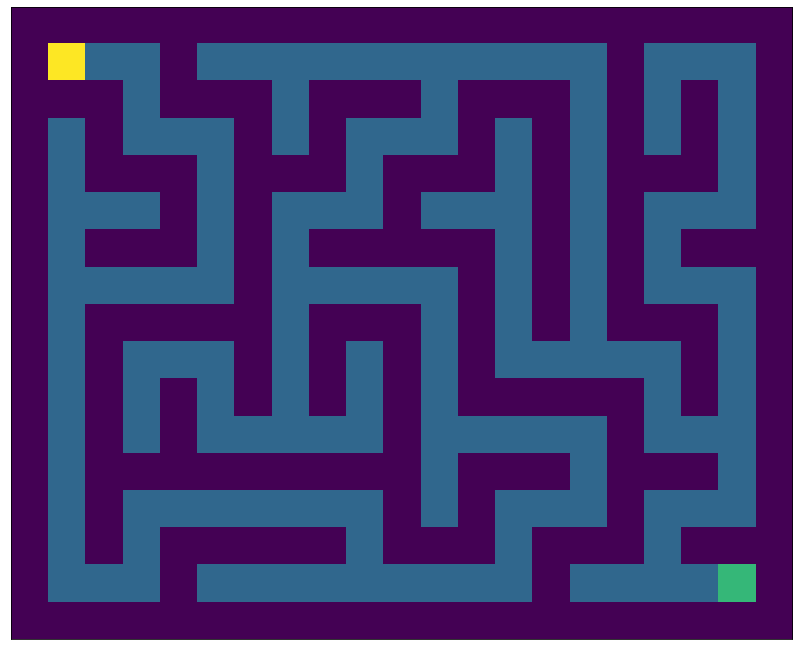

In [5]:
## Plot the generated Maze
maze1.plot_maze()#show_steps_gen

### 3.3. Affichage du Graph

............................................................
Associated Graph Generation -> done
............................................................
Graph plot : 


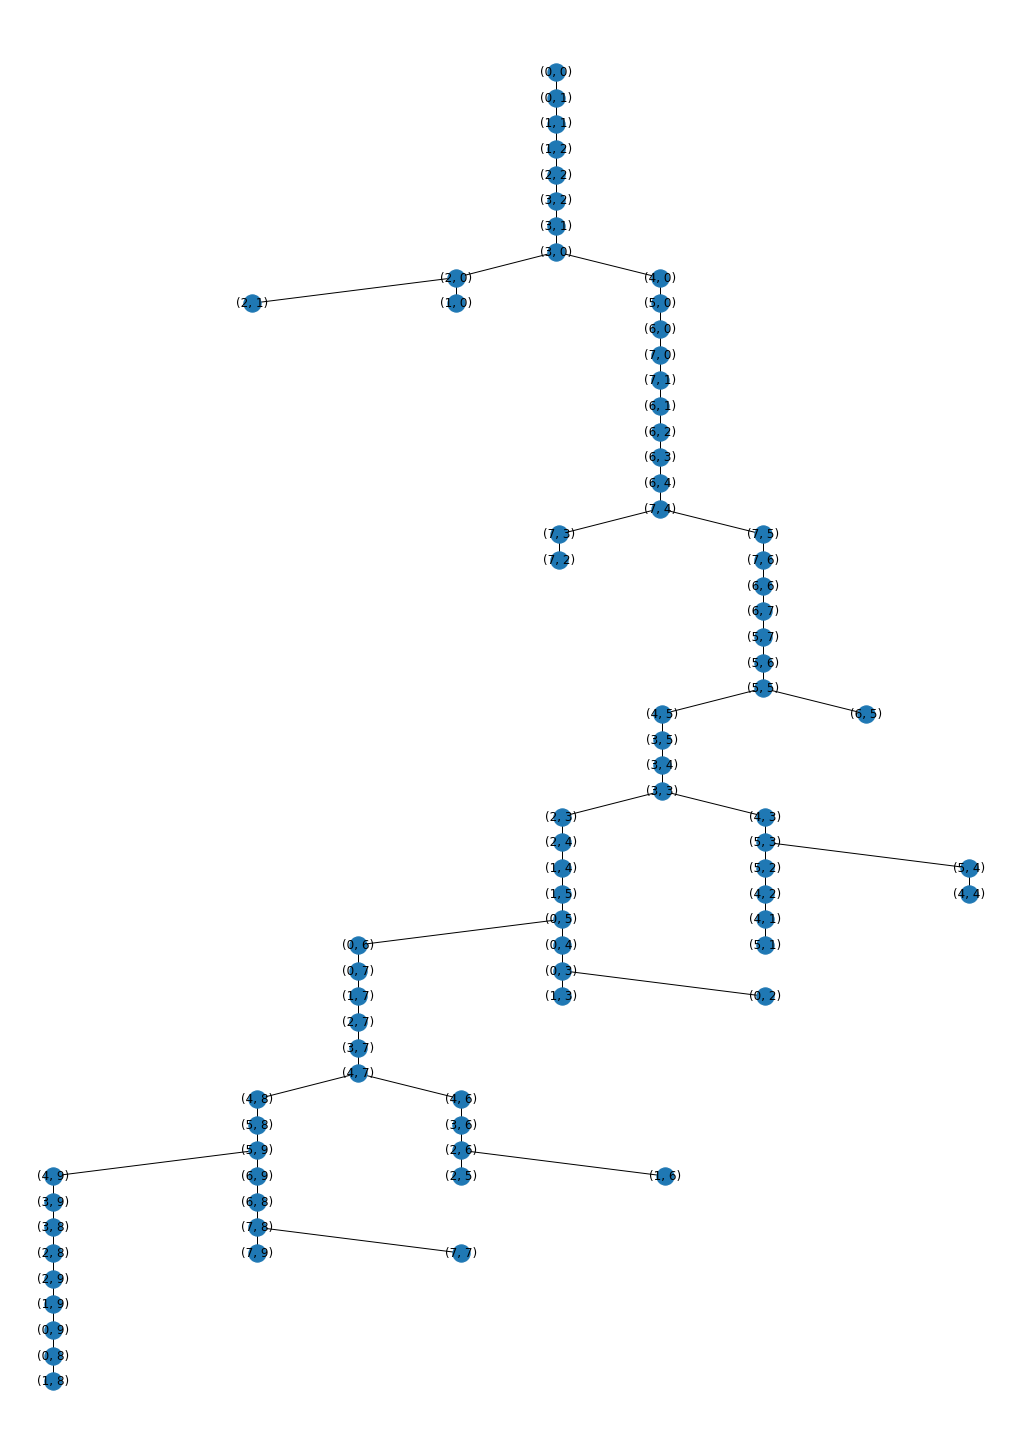

In [6]:
## Génère le Graph associé au Labyrinthe 
maze1.associate_graph()

## Tracé du Graph
" -> uniquement si la taille du labyrinthe le permet"
fig = plt.figure(figsize=(14,20))
maze1.plot_graph(layout_prog='dot', force_plot = True) # layout_prog='dot', 'neato' .. # force_plot = True


### 3.4 Parcours
#### 3.4.1 Sans recherche d'optimum

In [7]:
iter_dfs_list = maze1.iter_depth_first_searh(dep_pt)
iter_bfs_list = maze1.breadth_first_search(dep_pt)

if maze1.maze_dim[0]*maze1.maze_dim[1]<=120:
    print('liste des noeud obtenus avec la methode dfs iterative : {}. La longueur du parcours est de {} noeuds'.format(iter_dfs_list, len(iter_dfs_list)))
    print('liste des noeud obtenus avec la methode bfs iterative : {}. La longueur du parcours est de {} noeuds'.format(iter_bfs_list, len(iter_bfs_list)))
else:
    print('Les chemins ne sont pas affichés car trop long')

liste des noeud obtenus avec la methode dfs iterative : [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (6, 2), (6, 3), (6, 4), (7, 4), (7, 5), (7, 6), (6, 6), (6, 7), (5, 7), (5, 6), (5, 5), (6, 5), (4, 5), (3, 5), (3, 4), (3, 3), (4, 3), (5, 3), (5, 4), (4, 4), (5, 2), (4, 2), (4, 1), (5, 1), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 4), (0, 3), (0, 2), (1, 3), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (4, 6), (3, 6), (2, 6), (1, 6), (2, 5), (4, 8), (5, 8), (5, 9), (6, 9), (6, 8), (7, 8), (7, 7), (7, 9), (4, 9), (3, 9), (3, 8), (2, 8), (2, 9), (1, 9), (0, 9), (0, 8), (1, 8), (7, 3), (7, 2), (2, 0), (1, 0), (2, 1)]. La longueur du parcours est de 80 noeuds
liste des noeud obtenus avec la methode bfs iterative : [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (3, 0), (2, 0), (4, 0), (2, 1), (1, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (6, 2), (6, 3), (6, 4), (7, 4), (7, 3), (7, 5), (7, 2), (7, 6), (6, 

Le parcours en longueur et le parcours en largeur passent par touts les points 

#### 3.4.2 Recherche d'optimum

In [8]:
## test recherche de chemins pour aller d'un point à un autre
paths = maze1.find_paths_dfs(dep_pt, arr_pt)
it = 0
for path in paths:
    it +=1
print("Nous avons trouvé {} chemins différents permettant d'aller du point {} au point {}.".format(it, dep_pt, arr_pt))
if it !=0:
    print('Le chemin est le suivant :', path, ', passant par ', len(path), 'sommets')

Nous avons trouvé 1 chemins différents permettant d'aller du point (0, 0) au point (7, 9).
Le chemin est le suivant : [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (6, 2), (6, 3), (6, 4), (7, 4), (7, 5), (7, 6), (6, 6), (6, 7), (5, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 4), (3, 3), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (4, 8), (5, 8), (5, 9), (6, 9), (6, 8), (7, 8), (7, 9)] , passant par  47 sommets


Le labyrinthe est un labyrinthe parfait, 

In [9]:
length, path = maze1.dijkstra_rec(dep_pt, arr_pt)
print('Plus court chemin pour le Graph est :', path, 'de longueur', length, '(on passe par {} sommets)'.format(length+1))

Plus court chemin pour le Graph est : [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (6, 1), (6, 2), (6, 3), (6, 4), (7, 4), (7, 5), (7, 6), (6, 6), (6, 7), (5, 7), (5, 6), (5, 5), (4, 5), (3, 5), (3, 4), (3, 3), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (4, 8), (5, 8), (5, 9), (6, 9), (6, 8), (7, 8), (7, 9)] de longueur 46 (on passe par 47 sommets)


Les deux chemins trouvé sont identiques, pour que le labyrinthe est parfait donc il n'existe qu'un seul chemin pour allez d'un point A à un point B.

## 4. Génération (utilisant algo prim) / Affichage et Parcours de Labyrinthe
### 4.1. Génération

In [10]:
## Init
dep_pt = (0,0)

## Generate Maze
maze2 = Mazes(node=dep_pt)
maze2.gen_maze_prim()

# Get the Maze dimensions

arr_pt = (maze2.maze_dim[1]-1, maze2.maze_dim[0]-1)

Width of your labyirinth? Please enter an Integer number : 10
Input is an integer number.
Input number for the Labyrinth Width is :  10
............................................................
Height of your labyirinth? Please enter an Integer number : 8
Input is an integer number.
Input number for the Labyrinth Height is :  8
............................................................
............................................................
Generation of the maze using dfs algorithm. Maze dimension : 10*8 = 80 cells
............................................................
Maze Generation -> done


### 4.2. Affichage du Labyrinthe

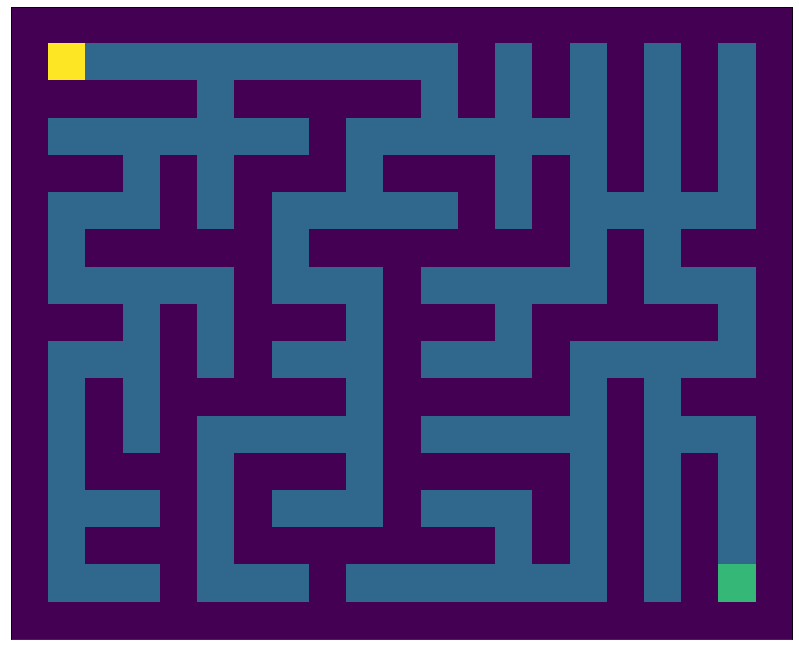

In [11]:
## Plot the generated Maze
maze2.plot_maze()

### 4.3. Affichage du Graph

............................................................
Associated Graph Generation -> done
............................................................
Graph plot : 


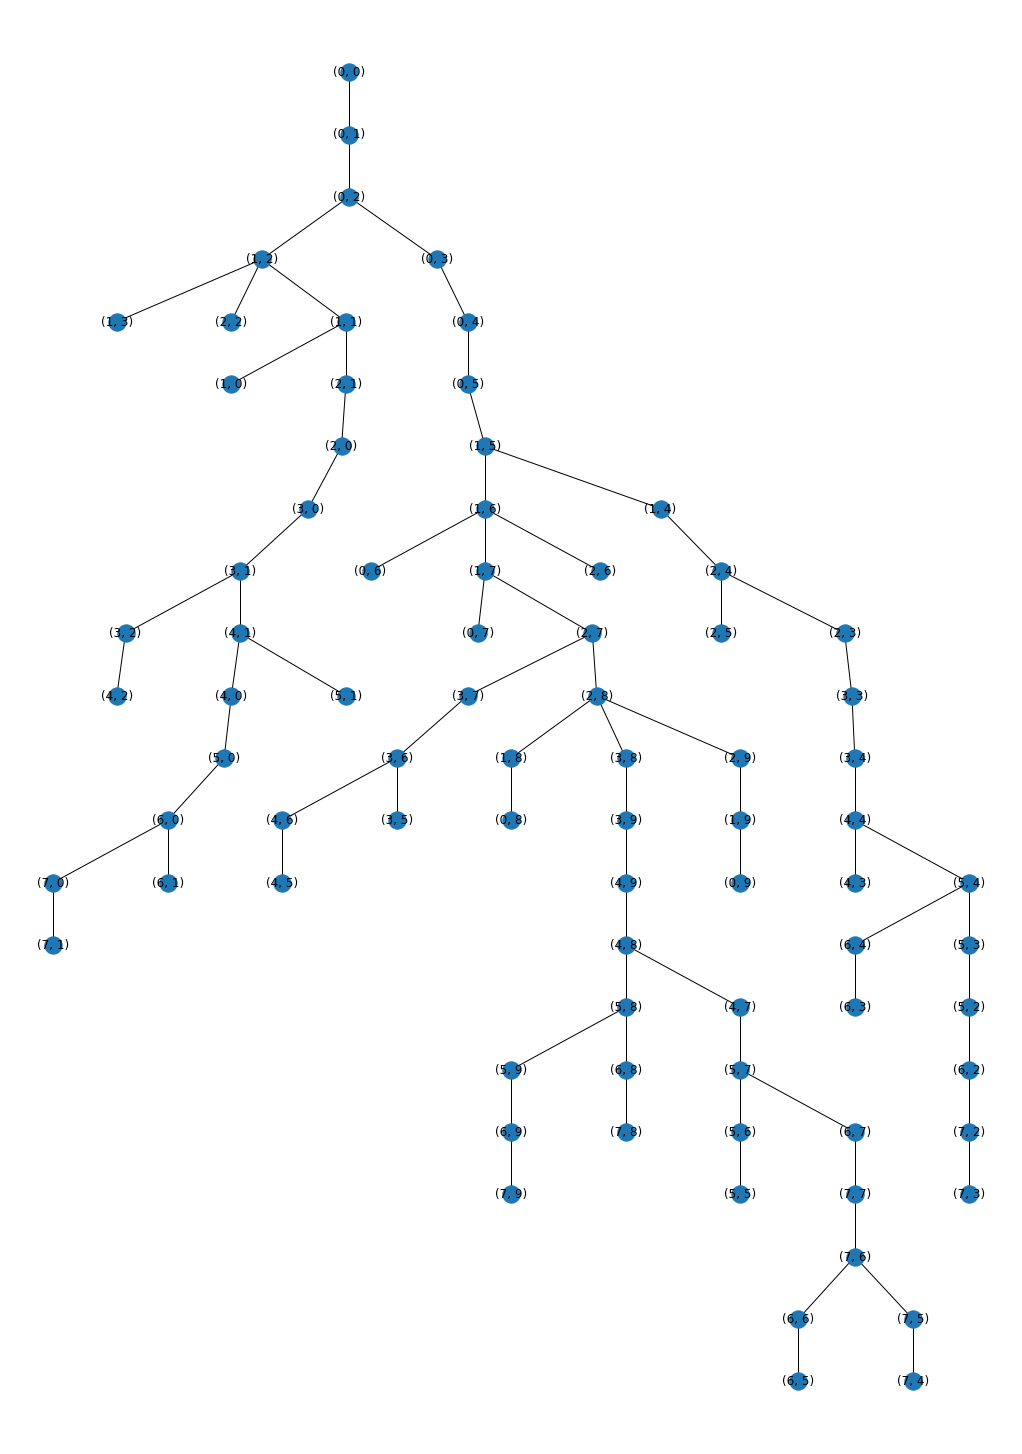

In [12]:
## Génère le Graph associé au Labyrinthe 
maze2.associate_graph()

## Tracé du Graph
" -> uniquement si la taille du labyrinthe le permet"
fig = plt.figure(figsize=(14,20))
maze2.plot_graph(layout_prog='dot', force_plot = True) # layout_prog='dot', 'neato' .. # force_plot = True


Le principal avantage de la génération d'un graph en utilisant l'algoriyhme prim en comparaison de l'algorithme dfs est que l'on limite la longueur des branches ou il n'y a pas de biffurcation. 

En effet avec le parcours en profodeur lorsqu'on génère le labyrinthe (surtout au début) il n'y a pas de contrainte donc cela créer de longues chaines sans bifurcations.

En revanche en utilisant l'algorithme de 'prim' on a un certain nombre de cloisons de longueur 1 dans le labyrinthe.

### 4.4 Parcours
#### 4.4.1 Sans recherche d'optimum

In [13]:
iter_dfs_list = maze2.iter_depth_first_searh(dep_pt)
iter_bfs_list = maze2.breadth_first_search(dep_pt)

if maze2.maze_dim[0]*maze2.maze_dim[1]<=120:
    print('liste des noeud obtenus avec la methode dfs iterative : {}. La longueur du parcours est de {} noeuds'.format(iter_dfs_list, len(iter_dfs_list)))
    print('liste des noeud obtenus avec la methode bfs iterative : {}. La longueur du parcours est de {} noeuds'.format(iter_bfs_list, len(iter_bfs_list)))
else:
    print('Les chemins ne sont pas affichés car trop long')

liste des noeud obtenus avec la methode dfs iterative : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (1, 4), (2, 4), (2, 3), (3, 3), (3, 4), (4, 4), (5, 4), (5, 3), (5, 2), (6, 2), (7, 2), (7, 3), (6, 4), (6, 3), (4, 3), (2, 5), (1, 6), (2, 6), (1, 7), (2, 7), (2, 8), (2, 9), (1, 9), (0, 9), (3, 8), (3, 9), (4, 9), (4, 8), (4, 7), (5, 7), (6, 7), (7, 7), (7, 6), (7, 5), (7, 4), (6, 6), (6, 5), (5, 6), (5, 5), (5, 8), (6, 8), (7, 8), (5, 9), (6, 9), (7, 9), (1, 8), (0, 8), (3, 7), (3, 6), (3, 5), (4, 6), (4, 5), (0, 7), (0, 6), (1, 2), (1, 1), (2, 1), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (4, 0), (5, 0), (6, 0), (6, 1), (7, 0), (7, 1), (3, 2), (4, 2), (1, 0), (2, 2), (1, 3)]. La longueur du parcours est de 80 noeuds
liste des noeud obtenus avec la methode bfs iterative : [(0, 0), (0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 2), (1, 1), (0, 4), (1, 0), (2, 1), (0, 5), (2, 0), (1, 5), (3, 0), (1, 6), (1, 4), (3, 1), (0, 6), (1, 7), (2, 6), (2, 4), (3, 2), (4, 1), (0, 7), (2, 

#### 4.4.2 Recherche d'optimum

In [14]:
## test recherche de chemins pour aller d'un point à un autre
paths = maze2.find_paths_dfs(dep_pt, arr_pt)
it = 0
for path in paths:
    it +=1
print("Nous avons trouvé {} chemins différents permettant d'aller du point {} au point {}.".format(it, dep_pt, arr_pt))
if it !=0:
    print('Le chemin est le suivant :', path, ', passant par ', len(path), 'sommets')

Nous avons trouvé 1 chemins différents permettant d'aller du point (0, 0) au point (7, 9).
Le chemin est le suivant : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 8), (5, 8), (5, 9), (6, 9), (7, 9)] , passant par  19 sommets


In [15]:
length, path = maze2.dijkstra_rec(dep_pt, arr_pt)
print('Plus court chemin pour le Graph est :', path, 'de longueur', length, '(on passe par {} sommets)'.format(length+1))

Plus court chemin pour le Graph est : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 8), (5, 8), (5, 9), (6, 9), (7, 9)] de longueur 18 (on passe par 19 sommets)


## Labyrinthe 50*50

In [16]:
## Init
dep_pt = (0,0)

## Generate Maze
maze3 = Mazes(node=dep_pt)
maze3.gen_maze_prim()

# Get the Maze dimensions

arr_pt = (maze3.maze_dim[1]-1, maze3.maze_dim[0]-1)

Width of your labyirinth? Please enter an Integer number : 50
Input is an integer number.
Input number for the Labyrinth Width is :  50
............................................................
Height of your labyirinth? Please enter an Integer number : 50
Input is an integer number.
Input number for the Labyrinth Height is :  50
............................................................
............................................................
Generation of the maze using dfs algorithm. Maze dimension : 50*50 = 2500 cells
............................................................
Maze Generation -> done


............................................................
Associated Graph Generation -> done


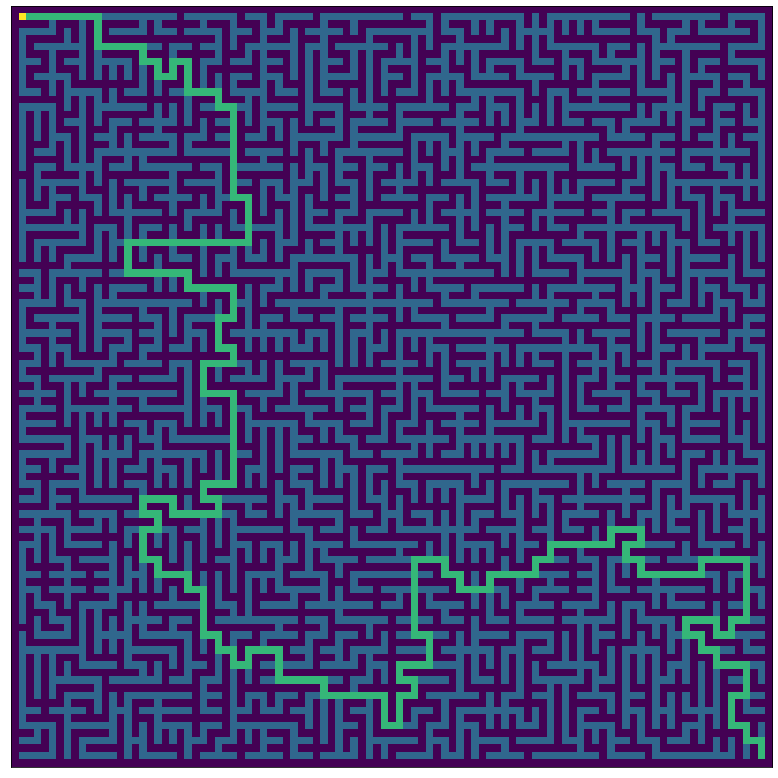

In [17]:
## Génère le Graph associé au Labyrinthe 
maze3.associate_graph()

## test recherche de chemins pour aller d'un point à un autre
paths = maze3.find_paths_dfs(dep_pt, arr_pt)
it = 0
for path in paths:
    it +=1
    
short_path = {}
old_elmt = None
for elmt in path:
    short_path[elmt] = old_elmt
    old_elmt = elmt
    
### Tracé du chemin optimal
maze3.plot_maze(short_path=short_path)

In [19]:
import time
t0 = time.time()
length, path = maze3.dijkstra_rec(dep_pt, arr_pt)
t = time.time() - t0
print('Plus court chemin pour le Graph est :', path, 'de longueur', length, '(on passe par {} sommets)'.format(length+1))
print('temps de calcul : {} seconde'.format(t))

Plus court chemin pour le Graph est : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 10), (3, 10), (3, 11), (4, 11), (5, 11), (5, 12), (5, 13), (6, 13), (6, 14), (7, 14), (8, 14), (9, 14), (10, 14), (11, 14), (12, 14), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 8), (15, 7), (16, 7), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (18, 11), (18, 12), (18, 13), (18, 14), (19, 14), (20, 14), (20, 13), (21, 13), (22, 13), (22, 14), (23, 14), (23, 13), (23, 12), (24, 12), (25, 12), (25, 13), (25, 14), (26, 14), (27, 14), (28, 14), (29, 14), (30, 14), (31, 14), (31, 13), (31, 12), (32, 12), (32, 13), (33, 13), (33, 12), (33, 11), (33, 10), (32, 10), (32, 9), (32, 8), (33, 8), (33, 9), (34, 9), (34, 8), (35, 8), (36, 8), (36, 9), (37, 9), (37, 10), (37, 11), (38, 11), (38, 12), (39, 12), (40, 12), (41, 12), (41, 13), (42, 13), (42, 14), (43, 14), (43, 15), (42, 15)

L'algorithme de dijkstra ayant une complexité polynomiale, (plus précisement , pour ${\displaystyle n}$ sommets et ${\displaystyle a}$ arcs, la complexité en temps est en ${\displaystyle O((a+n)\log n)}$) il peux donc être interésant d'implementer d'autre algorithmes comme 'prim' ou 'Krukal' pour gagner en temps de calcul